# Volve Field Production Data Plots

Volve Field production data per well from https://data.equinor.com/dataset/Volve<br>

- Original source file ('Volve production data.xlsx') contains 2 tabs: Daily Production Data and Monthly Production Data.<br>
- Data for 7 wells on each (together spanning 2007 - 2014).<br>
- Daily production has BORE_OIL_VOL, BORE_GAS_VOL, BORE_WAT_VOL, BORE_WI_VOL (injection). Date format 07-Apr-14.<br>
- Monthly production has Oil, Gas, Water, GI, WI (Sm3). Date format 'Year: 2014' and 'Month 4'.<br>

WELL_BORE_CODE - NPD Wellbore name<br>
- 15/9-F-1 C - 15/9-F-1 C<br>
- 15/9-F-11 H - 15/9-F-11<br>
- 15/9-F-12 H - 15/9-F-12<br>
- 15/9-F-14 H - 15/9-F-14<br>
- 15/9-F-15 D - 15/9-F-15 D<br>
- 15/9-F-4 AH - 15/9-F-4<br>
- 15/9-F-5 AH - 15/9-F-5<br>

AIM: REFORMAT THE DATA FOR IMPORT TO IC SOFTWARE<br>
- Need to split daily and monthly production from source file into single-well files.<br>
- IC's preferred date/time format is 01-Jun-2016 00:00.<br>
- Also need to add new columns for and calculate cumulative oil, gas and water production.

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter

pd.options.display.float_format = "{:.2f}".format

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 18.0
fig_size[1] = 9.0
plt.rcParams["figure.figsize"] = fig_size
print("New size:", fig_size)

Current size: [6.0, 4.0]
New size: [18.0, 9.0]


In [3]:
df_daily = pd.read_excel('input_data/Volve production data.xlsx', sheet_name='Daily Production Data')
df_monthly = pd.read_excel('input_data/Volve production data.xlsx', sheet_name='Monthly Production Data')

In [4]:
######################################################### MONTHLY #########################################################

print('df_monthly shape:', df_monthly.shape, '\n')
print(df_monthly.dtypes)
df_monthly.drop([0], inplace=True) 
# For the record, Oil, Gas and Water all in Sm3 (standard cubic metres)
df_monthly.head()

df_monthly shape: (527, 10) 

Wellbore name     object
NPDCode          float64
Year             float64
Month            float64
On Stream         object
Oil               object
Gas               object
Water             object
GI                object
WI                object
dtype: object


,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
1,15/9-F-1 C,7405.00,2014.00,4.00,227.50,11142.47,1597936.65,0,NaN,NaN
2,15/9-F-1 C,7405.00,2014.00,5.00,733.83,24901.95,3496229.65,783.48,NaN,NaN
3,15/9-F-1 C,7405.00,2014.00,6.00,705.92,19617.76,2886661.69,2068.48,NaN,NaN
4,15/9-F-1 C,7405.00,2014.00,7.00,742.42,15085.68,2249365.75,6243.98,NaN,NaN
5,15/9-F-1 C,7405.00,2014.00,8.00,432.99,6970.43,1048190.80,4529.75,NaN,NaN


In [7]:
df_monthly[['NPDCode', 'Year', 'Month']] = df_monthly[['NPDCode', 'Year', 'Month']].astype(int)
df_monthly[['On Stream', 'Oil', 'Gas', 'Water', 'GI', 'WI']] = df_monthly[['On Stream', 'Oil', 'Gas', 'Water', 'GI', 'WI']].apply(pd.to_numeric, errors='coerce')
print(df_monthly.dtypes)

Wellbore name     object
NPDCode            int64
Year               int64
Month              int64
On Stream        float64
Oil              float64
Gas              float64
Water            float64
GI               float64
WI               float64
dtype: object


In [8]:
df_monthly.groupby('Wellbore name').tail(1)

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
25,15/9-F-1 C,7405,2016,4,140.82,1671.69,274213.17,4441.13,nan,nan
64,15/9-F-11,7078,2016,9,392.28,8609.18,1458816.35,46779.39,nan,nan
168,15/9-F-12,5599,2016,9,0.00,0.00,0.00,0.00,nan,nan
272,15/9-F-14,5351,2016,9,0.00,0.00,0.00,0.00,nan,nan
305,15/9-F-15 D,7289,2016,9,0.00,0.00,0.00,0.00,nan,nan
417,15/9-F-4,5693,2016,12,nan,nan,nan,nan,nan,nan
526,15/9-F-5,5769,2016,9,0.00,0.00,0.00,0.00,nan,0.00


In [9]:
# Drop GI column as no data
#df_monthly.drop('GI', axis=1, inplace=True)

#Add new columns to calculate the cumulatives by well
df_monthly['Cum_Oil'] = df_monthly.groupby('Wellbore name')['Oil'].cumsum()
df_monthly['Cum_Gas'] = df_monthly.groupby('Wellbore name')['Gas'].cumsum()
df_monthly['Cum_Water'] = df_monthly.groupby('Wellbore name')['Water'].cumsum()
df_monthly['Cum_WI'] = df_monthly.groupby('Wellbore name')['WI'].cumsum()

# Show the last row (cumulative totals) for each well
df_monthly.groupby('Wellbore name')[['Wellbore name', 'Cum_Oil', 'Cum_Gas', 'Cum_Water', 'Cum_WI']].tail(1)

,Wellbore name,Cum_Oil,Cum_Gas,Cum_Water,Cum_WI
25,15/9-F-1 C,177709.33,26440918.60,207302.39,nan
64,15/9-F-11,1147849.10,174310520.61,1090806.27,nan
168,15/9-F-12,4579609.55,667542278.02,6833320.37,nan
272,15/9-F-14,3942233.39,578009542.02,7121249.74,nan
305,15/9-F-15 D,148518.56,22505350.95,52366.40,nan
417,15/9-F-4,nan,nan,nan,nan
526,15/9-F-5,41160.68,6561825.74,13533.18,14089406.49


In [10]:
df_monthly.head()

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI,Cum_Oil,Cum_Gas,Cum_Water,Cum_WI
1,15/9-F-1 C,7405,2014,4,227.50,11142.47,1597936.65,0.00,nan,nan,11142.47,1597936.65,0.00,nan
2,15/9-F-1 C,7405,2014,5,733.83,24901.95,3496229.65,783.48,nan,nan,36044.42,5094166.30,783.48,nan
3,15/9-F-1 C,7405,2014,6,705.92,19617.76,2886661.69,2068.48,nan,nan,55662.18,7980827.99,2851.96,nan
4,15/9-F-1 C,7405,2014,7,742.42,15085.68,2249365.75,6243.98,nan,nan,70747.86,10230193.74,9095.94,nan
5,15/9-F-1 C,7405,2014,8,432.99,6970.43,1048190.80,4529.75,nan,nan,77718.29,11278384.54,13625.69,nan


In [11]:
# Create new date column for IC in format 01/04/2014

df_monthly['Date'] = df_monthly['Month'].map(str) + '/' + df_monthly['Year'].map(str)

df_monthly['Date'] = pd.to_datetime(df_monthly.Date, dayfirst=True)
df_monthly['Date'].dt.strftime("%d/%m/%Y")

# Show the last date for each well
print(df_monthly.groupby('Wellbore name')[['Wellbore name', 'Date']].tail(1))

print('\n', df_monthly['Date'].dtype)

    Wellbore name       Date
25     15/9-F-1 C 2016-04-01
64      15/9-F-11 2016-09-01
168     15/9-F-12 2016-09-01
272     15/9-F-14 2016-09-01
305   15/9-F-15 D 2016-09-01
417      15/9-F-4 2016-12-01
526      15/9-F-5 2016-09-01

 datetime64[ns]


In [12]:
# Production, sum wellbores
# STILL TO DO

test = df_monthly.groupby('Date')['Wellbore name', 'Date', 'Oil', 'Gas', 'Water']
print(test.head())

#plt.bar(test, df_monthly['Oil'])

# Need to groupby date?

    Wellbore name       Date      Oil        Gas    Water
1      15/9-F-1 C 2014-04-01 11142.47 1597936.65     0.00
2      15/9-F-1 C 2014-05-01 24901.95 3496229.65   783.48
3      15/9-F-1 C 2014-06-01 19617.76 2886661.69  2068.48
4      15/9-F-1 C 2014-07-01 15085.68 2249365.75  6243.98
5      15/9-F-1 C 2014-08-01  6970.43 1048190.80  4529.75
6      15/9-F-1 C 2014-09-01  9168.43 1414099.99  8317.59
7      15/9-F-1 C 2014-10-01  9468.06 1462063.99 10364.87
8      15/9-F-1 C 2014-11-01  6710.33 1044188.30  7234.24
9      15/9-F-1 C 2014-12-01   120.29   25857.08   183.44
10     15/9-F-1 C 2015-01-01 10875.53 1604934.60  6850.80
11     15/9-F-1 C 2015-02-01  9586.64 1439453.67 10744.99
12     15/9-F-1 C 2015-03-01  5879.22  856681.45 11607.44
13     15/9-F-1 C 2015-04-01  3924.18  566709.81  9815.16
14     15/9-F-1 C 2015-05-01  3832.69  559060.34  6167.47
15     15/9-F-1 C 2015-06-01  6344.50  925337.48 14548.69
16     15/9-F-1 C 2015-07-01  2093.95  315178.96  8454.26
17     15/9-F-

In [13]:
well = '15/9-F-1 C'

# Split out into one dataframe per well

df_monthly_159F1C = df_monthly.loc[(df_monthly['Wellbore name'] == '15/9-F-1 C')]
df_monthly_159F11 = df_monthly.loc[(df_monthly['Wellbore name'] == '15/9-F-11')]
df_monthly_159F12 = df_monthly.loc[(df_monthly['Wellbore name'] == '15/9-F-12')]
df_monthly_159F14 = df_monthly.loc[(df_monthly['Wellbore name'] == '15/9-F-14')]
df_monthly_159F15D = df_monthly.loc[(df_monthly['Wellbore name'] == '15/9-F-15 D')]
df_monthly_159F4 = df_monthly.loc[(df_monthly['Wellbore name'] == '15/9-F-4')]
df_monthly_159F5 = df_monthly.loc[(df_monthly['Wellbore name'] == '15/9-F-5')]

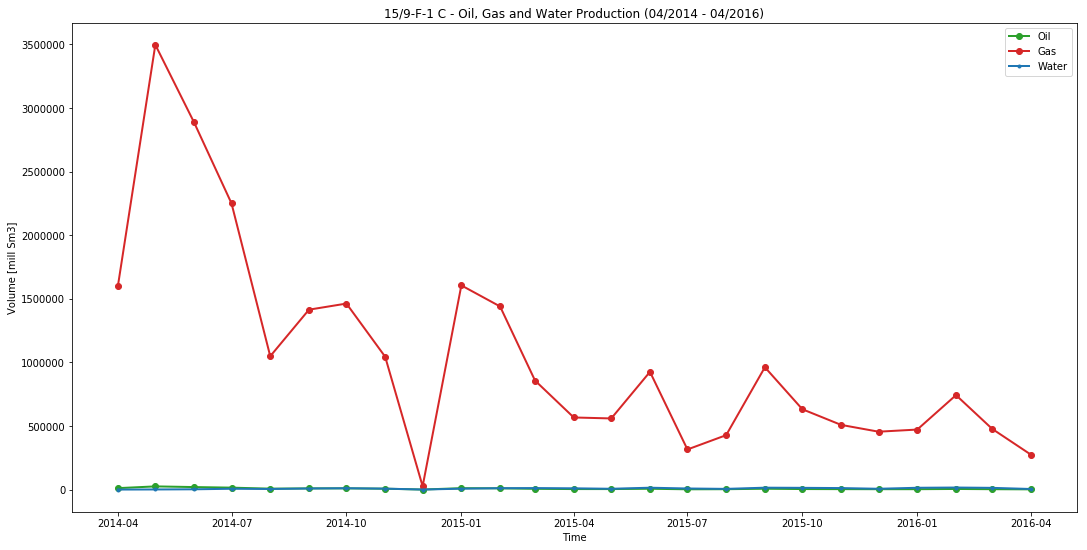

,Wellbore name,Date,Oil,Gas
21,15/9-F-1 C,2015-12-01,2949.42,454911.30
22,15/9-F-1 C,2016-01-01,2981.44,471675.96
23,15/9-F-1 C,2016-02-01,4718.03,742339.77
24,15/9-F-1 C,2016-03-01,2917.50,476830.19
25,15/9-F-1 C,2016-04-01,1671.69,274213.17


In [14]:
# Plot Oil, Gas and Water production for one well on the same axis

well = '15/9-F-1 C'
start = df_monthly_159F1C['Date'].iloc[0].strftime("%m/%Y")
end = df_monthly_159F1C['Date'].iloc[-1].strftime("%m/%Y")

A = df_monthly_159F1C['Date']
B = df_monthly_159F1C['Oil']
C = df_monthly_159F1C['Gas']
D = df_monthly_159F1C['Water']

color = 'tab:green'
plt.plot_date(A, B, color=color, linestyle='solid', linewidth=2, markersize=6)
plt.xlabel('Time')
plt.ylabel('Volume [mill Sm3]')
plt.legend(loc='upper right')

color='tab:red' 
plt.plot_date(A, C, color=color, linestyle='solid', linewidth=2, markersize=6)
plt.legend(loc='upper right')

color='tab:blue'
plt.plot_date(A, D, color=color, linestyle='solid', linewidth=2, markersize=3)
plt.legend(loc='upper right')

plt.title('{} - Oil, Gas and Water Production ({} - {})'.format(well, start, end))
plt.show()


df_monthly_159F1C[['Wellbore name', 'Date', 'Oil', 'Gas']].tail()

# Need to correct significant numbers to match mill/bill Sm3.
#plt.gca().yaxis.major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

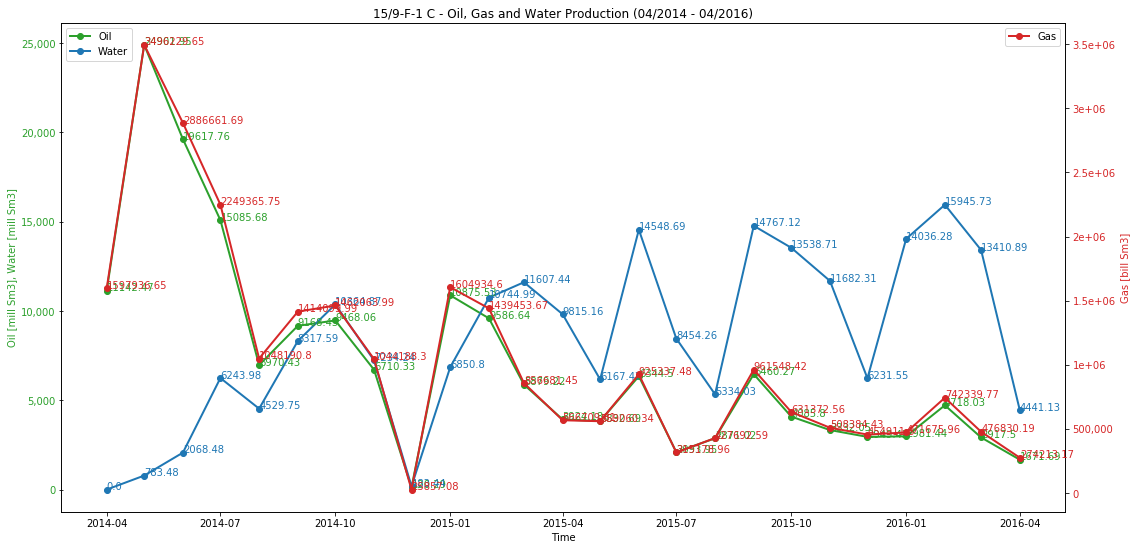

,Wellbore name,Date,Oil,Gas,Water
1,15/9-F-1 C,2014-04-01,11142.47,1597936.65,0.00
2,15/9-F-1 C,2014-05-01,24901.95,3496229.65,783.48
3,15/9-F-1 C,2014-06-01,19617.76,2886661.69,2068.48
4,15/9-F-1 C,2014-07-01,15085.68,2249365.75,6243.98
5,15/9-F-1 C,2014-08-01,6970.43,1048190.80,4529.75


In [15]:
# Plot the same, but on two axis (left-axis for Oil and Water, right-axis for Gas)

fig, ax1 = plt.subplots()

A = df_monthly_159F1C['Date']
B = df_monthly_159F1C['Oil']
C = df_monthly_159F1C['Gas']
D = df_monthly_159F1C['Water']

color = 'tab:green'
ax1.set_xlabel('Time')
ax1.set_ylabel('Oil [mill Sm3], Water [mill Sm3]', color=color)
ax1.plot_date(A, B, color=color, linestyle='solid', linewidth=2, markersize=6)
ax1.tick_params(axis='y', labelcolor=color, direction='inout')
ax1.legend(loc='upper right')
ax1.set_title('{} - Oil, Gas and Water Production ({} - {})'.format(well, start, end))

for i,j in zip(A,B):
    ax1.annotate('%s' %j, xy=(i,j), color=color)
    
    
color='tab:blue'
ax1.plot_date(A, D, color=color, linestyle='solid', linewidth=2, markersize=6)
ax1.legend(loc='upper left')

for i,j in zip(A,D):
    ax1.annotate('{}'.format(j), xy=(i, j), color=color)
    #xytext=(-65, 0), textcoords='offset points'

    
# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

color='tab:red'
ax2.set_ylabel('Gas [bill Sm3]', color=color)
ax2.plot_date(A, C, color=color, linestyle='solid', linewidth=2, markersize=6)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

for i,j in zip(A,C):
    ax2.annotate('{}'.format(j), xy=(i, j), color=color)
    
    
fmtr = StrMethodFormatter(('{x:,g}'))
ax1.yaxis.set_major_formatter(fmtr)
ax2.yaxis.set_major_formatter(fmtr)

plt.show()



df_monthly_159F1C[['Wellbore name', 'Date', 'Oil', 'Gas', 'Water']].head()

# Need to correct significant numbers to match mill/bill Sm3.
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

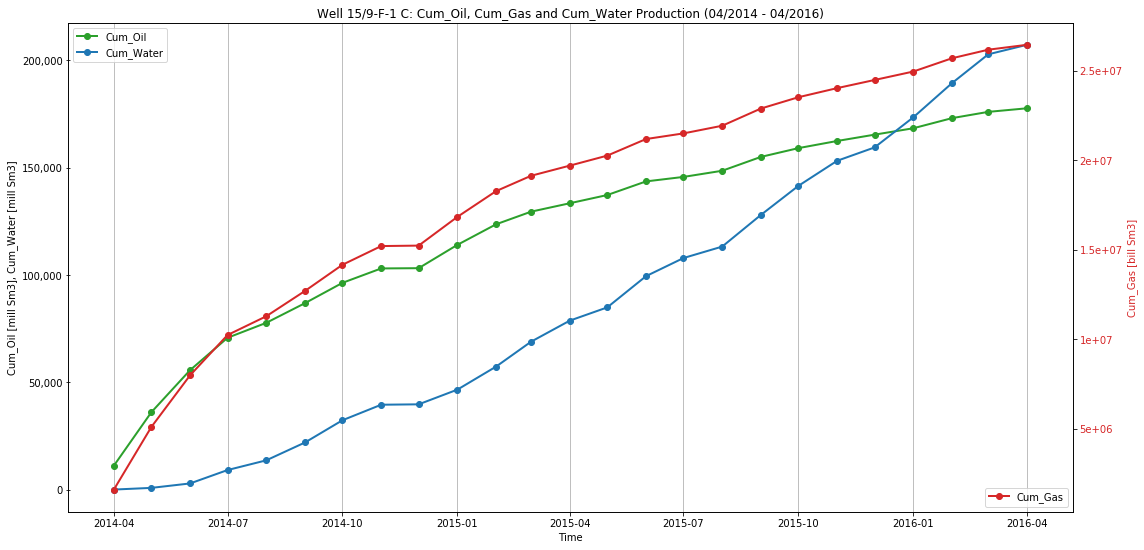

,Wellbore name,Date,Cum_Oil,Cum_Gas,Cum_Water
21,15/9-F-1 C,2015-12-01,165420.67,24475859.51,159468.36
22,15/9-F-1 C,2016-01-01,168402.11,24947535.47,173504.64
23,15/9-F-1 C,2016-02-01,173120.14,25689875.24,189450.37
24,15/9-F-1 C,2016-03-01,176037.64,26166705.43,202861.26
25,15/9-F-1 C,2016-04-01,177709.33,26440918.60,207302.39


In [16]:
# Plot the same, but on two axis (left-axis for Oil and Water, right-axis for Gas)

fig, ax1 = plt.subplots()

x1 = 'Date'
y1 = 'Cum_Oil'
y2 = 'Cum_Gas'
y3 = 'Cum_Water'

X1 = df_monthly_159F1C[x1]
Y1 = df_monthly_159F1C[y1]
Y2 = df_monthly_159F1C[y2]
Y3 = df_monthly_159F1C[y3]

color = 'tab:green'
ax1.set_xlabel('Time')
ax1.xaxis.grid(True)
ax1.set_ylabel('{} [mill Sm3], {} [mill Sm3]'.format(y1, y3))
ax1.plot_date(X1, Y1, color=color, linestyle='solid', linewidth=2, markersize=6)
ax1.tick_params(axis='y', direction='inout')
ax1.legend(loc='upper right')
ax1.set_title('Well {}: {}, {} and {} Production ({} - {})'.format(well, y1, y2, y3, start, end))

#for i,j in zip(X1,Y1):
#    ax1.annotate('%s' %j, xy=(i,j), color=color)
    
    
color='tab:blue'
ax1.plot_date(X1, Y3, color=color, linestyle='solid', linewidth=2, markersize=6)
ax1.legend(loc='upper left')

#for i,j in zip(X1,Y3):
#    ax1.annotate('{}'.format(j), xy=(i, j), color=color)

    
# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

color='tab:red'
ax2.set_ylabel('{} [bill Sm3]'.format(y2), color=color)
ax2.plot_date(X1, Y2, color=color, linestyle='solid', linewidth=2, markersize=6)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='lower right')

#for i,j in zip(X1,Y2):
#    ax2.annotate('{}'.format(j), xy=(i, j), color=color)
    
    
fmtr = StrMethodFormatter(('{x:,g}')) # STUDY FURTHER AND FIX GAS AXIS
ax1.yaxis.set_major_formatter(fmtr)
ax2.yaxis.set_major_formatter(fmtr)

plt.show()


df_monthly_159F1C[['Wellbore name', 'Date', 'Cum_Oil', 'Cum_Gas', 'Cum_Water']].tail()

# Why is NPD using Sm3 rather than MmBoe? Isn't that more readily comparable between oil and gas? Should I convert?

#Start lower left at 0,0?
#Plot both ongoing and cum production on same plot?

In [17]:
# value of observation / sum of all observations in variable
# cum_oil / (cum_oil + cum_gas + cum_water)
# 165420.67 / (165420.67 + 24475859.51 + 159468.36) = 

# To add up amounts of different petroleum products, they must first be converted to a uniform
# quantity and unit, most commonly using standard cubic metres of oil equivalents (Sm3 o.e.)

# 1 Sm3 oil = 1.0 Sm3 o.e.
# 1 Sm3 condensate = 1.0 Sm3 o.e.
# 1000 Sm3 gas = 1.0 Sm3 o.e.


from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = df_monthly_159F1C['Cum_Water'].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

df_normalized


#df_monthly_159F1C[['Wellbore name', 'Date', 'Cum_Oil', 'Cum_Gas', 'Cum_Water']]

ValueError: Expected 2D array, got 1D array instead:
array=[     0.      783.48   2851.96   9095.94  13625.69  21943.28  32308.15
  39542.39  39725.83  46576.63  57321.62  68929.06  78744.22  84911.69
  99460.38 107914.64 113248.67 128015.79 141554.5  153236.81 159468.36
 173504.64 189450.37 202861.26 207302.39].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
plt.plot_date(df_monthly_159F1C['Date'], df_monthly_159F1C['Oil'], linestyle='solid', linewidth=1.5, markersize=3, label='15/9-F-1 C')
plt.plot_date(df_monthly_159F11['Date'], df_monthly_159F11['Oil'], linestyle='solid', linewidth=1.5, markersize=3, label='15/9-F-11')
plt.plot_date(df_monthly_159F12['Date'], df_monthly_159F12['Oil'], linestyle='solid', linewidth=1.5, markersize=3, label='15/9-F-12')
plt.plot_date(df_monthly_159F14['Date'], df_monthly_159F14['Oil'], linestyle='solid', linewidth=1.5, markersize=3, label='15/9-F-14')
plt.plot_date(df_monthly_159F15D['Date'], df_monthly_159F15D['Oil'], linestyle='solid', linewidth=1.5, markersize=3, label='15/9-F-15 D')
plt.plot_date(df_monthly_159F4['Date'], df_monthly_159F4['Oil'], linestyle='solid', linewidth=1.5, markersize=3, label='15/9-F-4')
plt.plot_date(df_monthly_159F5['Date'], df_monthly_159F5['Oil'], linestyle='solid', linewidth=1.5, markersize=3, label='15/9-F-5')

plt.title('Volve field - Oil production (to Sept 2019)')
plt.ylabel('Oil [mill Sm3]')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Turn above cell into function to run on any column

fluid = 'Gas'
wells = ['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D', '15/9-F-4', '15/9-F-5']

for well in wells:
    df = df_monthly.loc[(df_monthly['Wellbore name'] == well)]
    plt.plot_date(df['Date'], df[fluid], linestyle='solid', linewidth=1.5, markersize=3, label=well)

plt.title('Volve Field - {} Production (to Sept 2019)'.format(fluid))
plt.ylabel('Gas [bill Sm3]')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Turn above cell into function to run on any column

fluid = 'Oil'

wells = []
#wells = ['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D', '15/9-F-4', '15/9-F-5']




# for well in df_monthly['Wellbore name'].unique():
#     print(well)
    
#     if df_monthlydf_monthly.lookup(self, well, fluid)
    
    
    
    
#     if df_monthly[fluid].tail(1) == 0:
#         print('Yes')
#     else:
#         print('No')
    
# #df_monthly.groupby('Wellbore name')[[fluid]].tail(1) == 0

# for well in wells:
#     df = df_monthly.loc[(df_monthly['Wellbore name'] == well)]
#     plt.plot_date(df['Date'], df[fluid], linestyle='solid', linewidth=1.5, markersize=3, label=well)

# plt.title('Title {}'.format(fluid))
# plt.legend(loc='upper left')
# plt.ylabel('Label')
# plt.show()

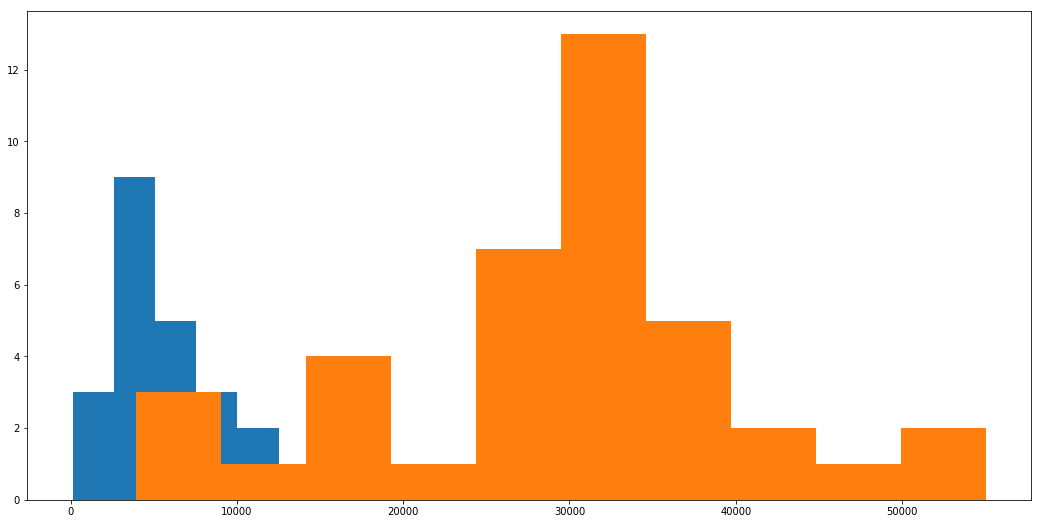

hi


In [20]:
plt.hist(df_monthly_159F1C['Oil'], stacked=True, label='15/9-F-1 C')
plt.hist(df_monthly_159F11['Oil'], stacked=True, label='15/9-F-11')

# plt.plot_date(df_monthly_159F12['Date'], df_monthly_159F12['Oil'], linestyle='solid', linewidth=1.5, markersize=3, label='15/9-F-12')
# plt.plot_date(df_monthly_159F14['Date'], df_monthly_159F14['Oil'], linestyle='solid', linewidth=1.5, markersize=3, label='15/9-F-14')
# plt.plot_date(df_monthly_159F15D['Date'], df_monthly_159F15D['Oil'], linestyle='solid', linewidth=1.5, markersize=3, label='15/9-F-15 D')
# plt.plot_date(df_monthly_159F4['Date'], df_monthly_159F4['Oil'], linestyle='solid', linewidth=1.5, markersize=3, label='15/9-F-4')
# plt.plot_date(df_monthly_159F5['Date'], df_monthly_159F5['Oil'], linestyle='solid', linewidth=1.5, markersize=3, label='15/9-F-5')



plt.show()
print('hi')

In [24]:
plt.figure()
plt.bar([df_monthly_159F1C['Date'], [df_monthly_159F1C['Oil'], df_monthly_159F11['Oil'], df_monthly_159F12['Oil'], df_monthly_159F14['Oil'],
                                     df_monthly_159F15D['Oil'], df_monthly_159F4['Oil'], df_monthly_159F5['Oil']], stacked=True, height=10)
plt.legend(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D', '15/9-F-4', '15/9-F-5'])
plt.show()

#color=["red", "blue", "violet"], normed = True)
#plt.legend({label1: "red", label2: "blue", label3: "violet"})
         
width = 0.4
         
plt.bar([df_monthly_159F1C['Date'], [df_monthly_159F1C['Oil'], width)
                                     
plt.bar(, width, bottom=dataset[1], color='b')
plt.bar(df_monthly_159F1C['Date'], df_monthly_159F1C['Gas'], width, )
plt.bar(ind, dataset[4], width, )

SyntaxError: invalid syntax (<ipython-input-24-80f55e8b0cbf>, line 3)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

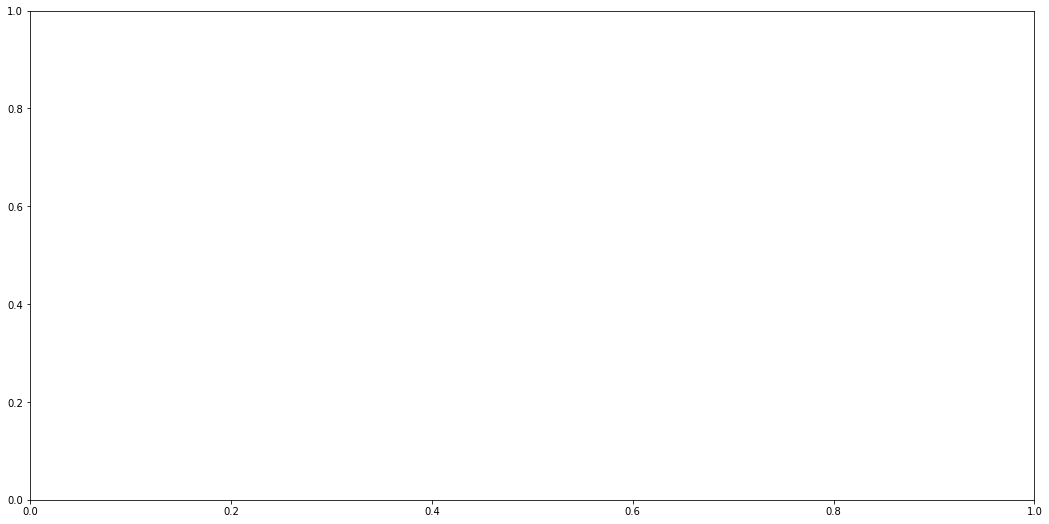

In [25]:
N = 5
Bar1_Oil = df_monthly_159F1C['Oil']
Bar2_Oil = df_monthly_159F11['Oil']
Bar3_Oil = df_monthly_159F12['Oil']

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, height=Bar1_Oil, width=0.35)
p2 = plt.bar(ind, Bar2_Oil, width=0.35, bottom=Bar1_Oil)
p2 = plt.bar(ind, Bar3_Oil, width=0.35, bottom=Bar1_Oil+Bar2_Oil)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()


# p1 = plt.bar(df_monthly_159F1C['Date'], df_monthly_159F1C['Oil'], width, yerr=p1)
# p2 = plt.bar(df_monthly_159F11['Date'], df_monthly_159F11['Oil'], width, yerr=)
# p3 = plt.bar(df_monthly_159F12['Date'], df_monthly_159F12['Oil'], width, yerr=)
# plt.show()

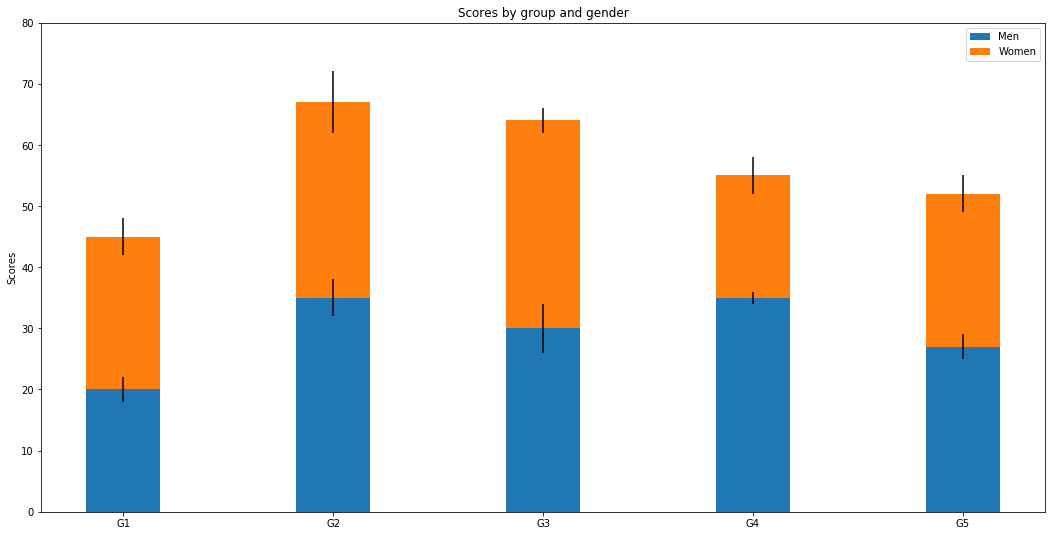

In [26]:
import numpy as np

N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width, bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

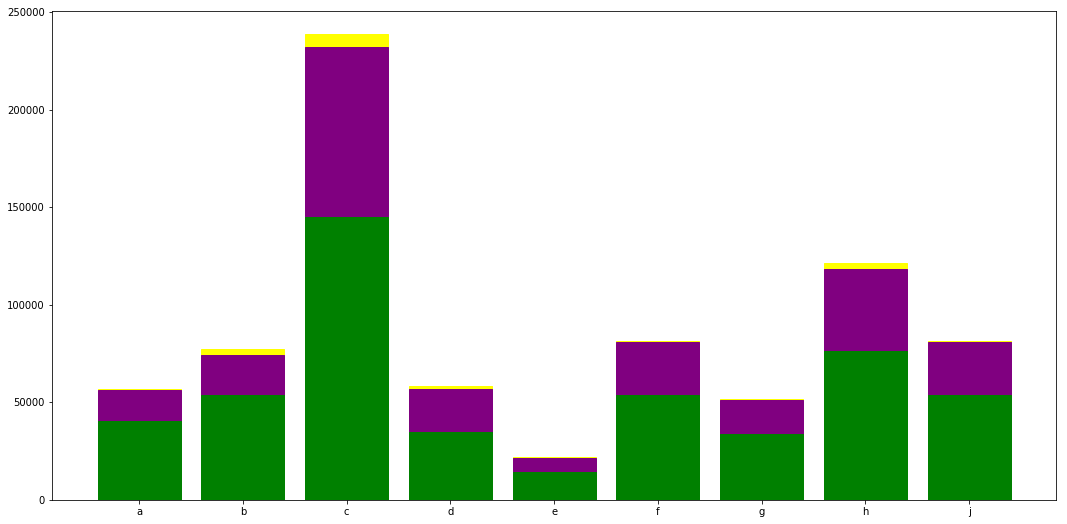

In [27]:
columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j']
pos = np.arange(9)
var_one = np.array([40348, 53544, 144895, 34778, 14322, 53546, 33623, 76290, 53546])
var_two = np.array([15790, 20409, 87224, 22085, 6940, 27099, 17575, 41862, 27099])
var_three = np.array([692, 3254, 6645, 1237, 469, 872, 569, 3172, 872])

plt.bar(pos, np.add(np.add(var_three, var_two), var_one), color='yellow', edgecolor='yellow')
plt.bar(pos, np.add(var_two, var_one), color='purple', edgecolor='purple')
plt.bar(pos, var_one, color='green', edgecolor='green')
plt.xticks(pos, columns)
plt.show()

In [28]:
columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j']
pos = np.arange(40)
var_one = np.array(df_monthly_159F1C['Oil'])
var_two = np.array(df_monthly_159F11['Oil'])
var_three = np.array(df_monthly_159F12['Oil'])

plt.bar(pos, np.add(np.add(var_three, var_two), var_one), color='yellow', edgecolor='yellow')
plt.bar(pos, np.add(var_two, var_one), color='purple', edgecolor='purple')
plt.bar(pos, var_one, color='green', edgecolor='green')
plt.xticks(pos, columns)
plt.show()

ValueError: operands could not be broadcast together with shapes (104,) (39,) 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

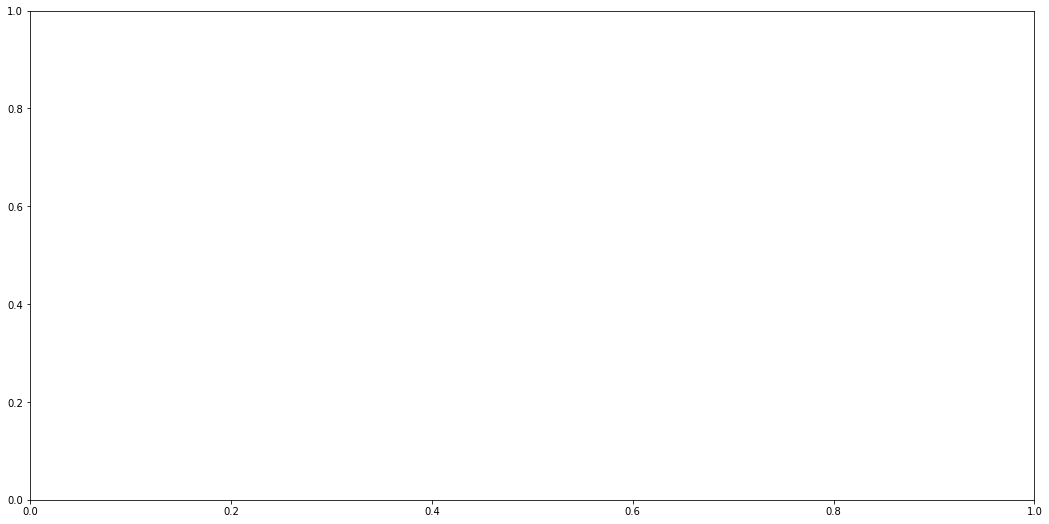

In [29]:
barWidth = 0.50

lst39 = list(range(1, 40))
print(lst39)

i1 = np.array(df_monthly_159F1C['Oil'].index)
d1 = np.array(df_monthly_159F1C['Oil'])
i2 = np.array(df_monthly_159F11['Oil'].index)
d2 = np.array(df_monthly_159F11['Oil'])

p1 = plt.bar(lst39, d1, color='#b5ffb9',edgecolor='white',width=barWidth)
p2 = plt.bar(lst39, d2, color='#f9bc86',edgecolor='white',width=barWidth, bottom=d1)

print('Length:', len(i1), '\n', i1)
print('Length:', len(d1), '\n', d1)
print('Length:', len(i2), '\n', i2)
print('Length:', len(d2), '\n', d2)
print('Length:', len(lst39), '\n', list(lst39))

# p1 = plt.bar(ind, height=Bar1_Oil, width=0.35)
# p2 = plt.bar(ind, Bar2_Oil, width=0.35, bottom=Bar1_Oil)
# p2 = plt.bar(ind, Bar3_Oil, width=0.35, bottom=Bar1_Oil+Bar2_Oil)

#numpyObject = np.array(listObject)

In [30]:
num1 = list(yearly_status.index)
num2 = list(yearly_posts.index)
barWidth = 0.50
plt.bar(num1, yearly_status.values.flatten(), color='#b5ffb9',edgecolor='white',width=barWidth)
plt.bar(num2, yearly_posts.values.flatten(), color='#f9bc86',edgecolor='white',width=barWidth)

NameError: name 'yearly_status' is not defined

In [31]:
######################################################### DAILY #########################################################

print('df_daily shape:', df_daily.shape, '\n')
print(df_daily.dtypes)
df_daily.head()

df_daily shape: (15634, 24) 

DATEPRD                     datetime64[ns]
WELL_BORE_CODE                      object
NPD_WELL_BORE_CODE                   int64
NPD_WELL_BORE_NAME                  object
NPD_FIELD_CODE                       int64
NPD_FIELD_NAME                      object
NPD_FACILITY_CODE                    int64
NPD_FACILITY_NAME                   object
ON_STREAM_HRS                      float64
AVG_DOWNHOLE_PRESSURE              float64
AVG_DOWNHOLE_TEMPERATURE           float64
AVG_DP_TUBING                      float64
AVG_ANNULUS_PRESS                  float64
AVG_CHOKE_SIZE_P                   float64
AVG_CHOKE_UOM                       object
AVG_WHP_P                          float64
AVG_WHT_P                          float64
DP_CHOKE_SIZE                      float64
BORE_OIL_VOL                       float64
BORE_GAS_VOL                       float64
BORE_WAT_VOL                       float64
BORE_WI_VOL                        float64
FLOW_KIND               

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.00,0.00,...,%,0.00,0.00,0.00,0.00,0.00,0.00,nan,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.00,nan,...,%,0.00,0.00,0.00,0.00,0.00,0.00,nan,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.00,nan,...,%,0.00,0.00,0.00,0.00,0.00,0.00,nan,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.00,nan,...,%,0.00,0.00,0.00,0.00,0.00,0.00,nan,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.00,310.38,...,%,33.10,10.48,33.07,0.00,0.00,0.00,nan,production,OP
